<a href="https://colab.research.google.com/github/charlieswb/Learning/blob/master/Tensorflow/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#np.random.seed(42)

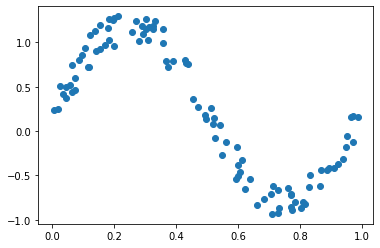

In [69]:
X = np.random.rand(100, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(100, 1)
plt.scatter(X, Y)
plt.show()

In [114]:
def relu(x):
  return tf.where(x>0, x ,0)

class MLP():
  def __init__(self, neurons=[1, 100, 100, 1], activation=[relu, relu, None]):
    self.W = []
    self.b = []
    self.activation = activation
    for i in range(1, len(neurons)):
      self.W.append(tf.Variable(np.random.randn(neurons[i-1], neurons[i]))) #W
      self.b.append(tf.Variable(np.random.randn(neurons[i]))) #b
  def __call__(self, x):
    for i in range(0, len(self.W)):
      x = x @ self.W[i] + self.b[i]
      if self.activation[i] is not None:
        x = self.activation[i](x)
    return x
  def fit(self, X, Y, lr=0.0001, epochs=1000):
    for epoch in range(epochs):
      with tf.GradientTape() as tape:
        loss = tf.reduce_mean(tf.square(self(X) - Y))
      dW, db = tape.gradient(loss, [self.W, self.b])
      #assign weight and bias
      for i in range(len(self.W)):
        self.W[i].assign_sub(lr * dW[i])
        self.b[i].assign_sub(lr * db[i])
      if epoch % 1000 == 0:
        print(epoch, loss.numpy(), self.eval(X,Y))
    print(epochs, loss.numpy(), self.eval(X,Y))
  def eval(self, X, Y):
    Y_predict = self(X)
    correct = tf.equal(tf.argmax(Y_predict, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    return accuracy.numpy()

In [71]:
model = MLP()
model.fit(X, Y, lr=0.0001, epochs=7000)

0 230.42138424133995
1000 0.026599439265982877
2000 0.020138008973223435
3000 0.016796194842193732
4000 0.015372693991468667
5000 0.014892568203545065
6000 0.014486192835343921
7000 0.014252387478823817


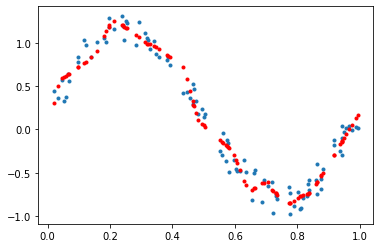

In [58]:
Z = model(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()

Try XOR

In [78]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0, 1, 1, 0]]).T

In [83]:
np.random.randint(1000000)

125646

In [80]:
model = MLP(neurons=[2, 100, 100, 1], activation=[relu, relu, None])
model.fit(X, Y, lr=0.0001, epochs=2000)

0 2310.3539432050866
1000 4.395135837136945e-29
2000 6.209294437201668e-30


In [82]:
tf.round(model(X)).numpy()

array([[0.],
       [1.],
       [1.],
       [0.]])

Iris

In [84]:
import pandas as pd

In [86]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [95]:
X = df.iloc[:, 0:4].values
Y = pd.get_dummies(df.iloc[:, -1]).values

In [101]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, Y_train, Y_test = split(X, Y, test_size=0.5, random_state=33)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(75, 4)
(75, 4)
(75, 3)
(75, 3)


In [115]:
model_iris = MLP(neurons=[4,100,50,3], activation=[tf.sigmoid, tf.sigmoid, tf.sigmoid])
model_iris.fit(X_train, Y_train, lr=0.1, epochs=5000)

0 0.3191428870031393 0.37333333
1000 0.03337410762959268 0.9866667
2000 0.01967365384388982 0.9866667
3000 0.014734083494272802 0.9866667
4000 0.012107570867974569 0.9866667
5000 0.01033906328794753


In [117]:
model_iris.eval(X_test, Y_test)

0.92